In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import mplcyberpunk

In [97]:
# Ns = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]
Ns = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
averages = []
maxima = []
stddevs = []

for ni, N in enumerate(Ns):
    with open(f'test_1_results/N{N}.txt', 'r') as f:
        averages.append([])
        maxima.append([])
        stddevs.append([])
        for line in f:
            count, total, average, maximum, minimum, stddev = map(float, line.split())
            averages[ni].append(average)
            maxima[ni].append(maximum)
            stddevs[ni].append(stddev)

average = np.array([sum(p)/len(p) for p in averages])
maximum = np.array([sum(p)/len(p) for p in maxima])
stddev = np.array([np.sqrt(sum(map(lambda x:x*x, p))/len(p)) for p in stddevs])

all_averages = [[N, p] for (ni, N) in enumerate(Ns) for p in averages[ni]]
all_maxima = [[N, p] for (ni, N) in enumerate(Ns) for p in maxima[ni]]

all_averages = [list(p) for p in zip(*all_averages)]
all_maxima = [list(p) for p in zip(*all_maxima)]

Text(0.5, 1.0, 'Period between consecutive server broadcasts')

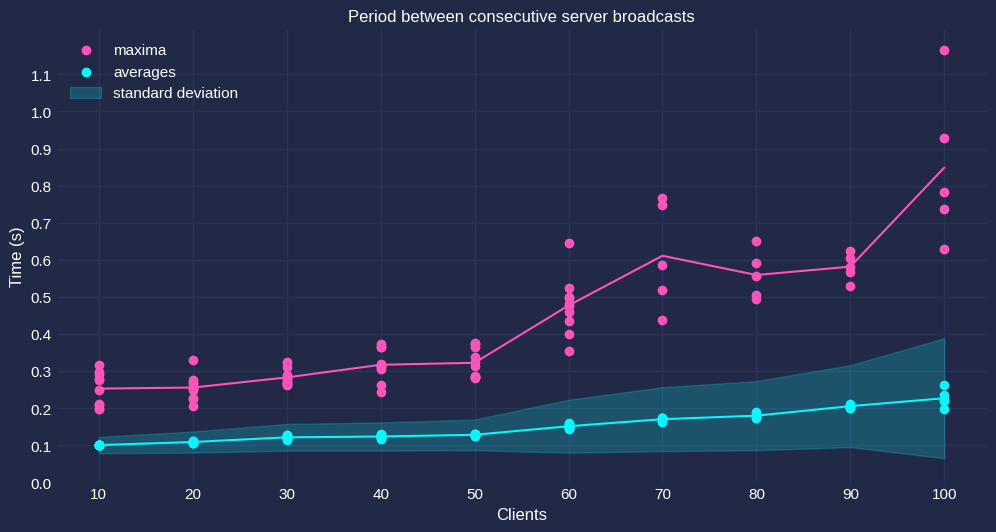

In [124]:
plt.style.use("cyberpunk")

# for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
#     plt.rcParams[param] = '#212946'  # bluish dark grey
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '1'  # very light grey

c1 = '#08F7FE'
c2 = '#FE53BB'

fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
ax.scatter(x=all_maxima[0], y=all_maxima[1], color=c2, label='maxima')
ax.plot(Ns, maximum, color=c2)
ax.scatter(x=all_averages[0], y=all_averages[1], color=c1, label='averages')
ax.plot(Ns, average, color=c1)
ax.fill_between(Ns, average - stddev, average + stddev, color=c1, alpha=0.2)

handles, labels = ax.get_legend_handles_labels()
patch = mpatches.Patch(color=c1, alpha=0.2, label='standard deviation')
handles.append(patch)
ax.legend(handles=handles)
ax.set_xticks(np.arange(10, 101, step=10))
ax.set_yticks(np.arange(0, 1.2, step=0.1))

ax.set_xlabel("Clients")
ax.set_ylabel("Time (s)")
ax.set_title('Period between consecutive server broadcasts')